[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nepal-College-of-Information-Technology/AI-Data-Science-Worksop-2024/blob/main/Practice%20Yourself/Assignment_6.1_Decision_Trees_and_Random_Forests.ipynb)


# Assignment 6.1: Decision Trees and Random Forests

## Objective:
Build and evaluate a **Decision Tree** and a **Random Forest** classifier to predict whether a bank customer will subscribe to a term deposit based on various customer attributes (such as age, job, marital status, etc.).

### Dataset:
You can use the [Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing) or a similar dataset with customer attributes.

---

## Tasks:

### Task 1: Load and Preprocess the Dataset

1. Load the dataset into a Pandas DataFrame.
2. Handle any missing data if present.
3. Convert categorical variables to numerical values using one-hot encoding.




> Add blockquote


```python
import pandas as pd

# Load the dataset
df = pd.read_csv('your_dataset.csv')  # Replace with the actual dataset path

# Handle missing data (if necessary)
# df.fillna(0, inplace=True)  # Example for handling missing values

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the preprocessed dataset
df_encoded.head()

In [2]:
import pandas as pd

df = pd.read_csv('bank.csv')

df.fillna(0, inplace=True)

df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
1,56,45,5,1467,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
2,41,1270,5,1389,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
3,55,2476,5,579,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
4,54,184,5,673,2,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True


### Task 2: Split the Dataset

Split the dataset into training and testing sets using an 80-20 ratio.

In [3]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('balance', axis=1)
y = df_encoded['balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")


Training set shape: (8929, 42), (8929,)
Testing set shape: (2233, 42), (2233,)


### Task 3: Train a Decision Tree Classifier

1.	Train a Decision Tree Classifier on the training data.
2.	Visualize the trained decision tree.
3.	Make predictions on the test data.

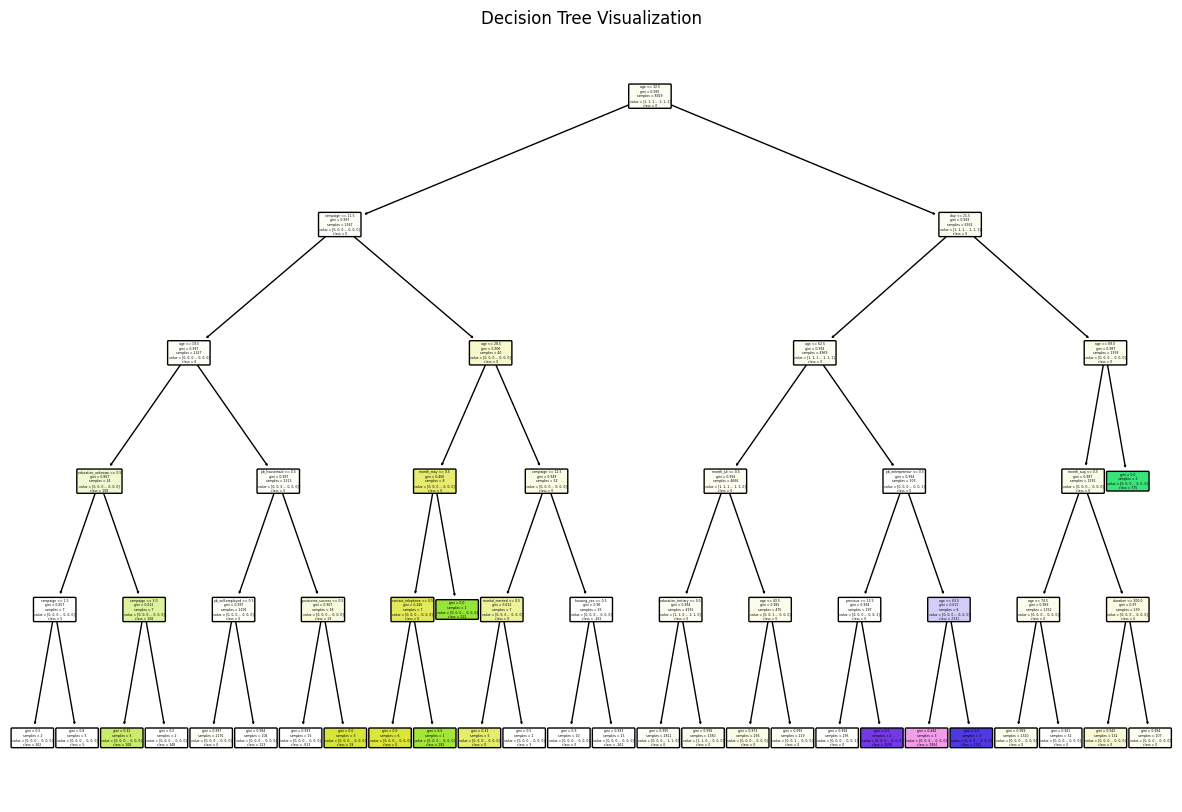

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=[str(cls) for cls in clf.classes_], filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

predictions = clf.predict(X_test)

### Task 4: Train a Random Forest Classifier

1.	Train a Random Forest Classifier on the training data.
2.	Compare the performance of the Random Forest with the Decision Tree.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

X_train_sample = X_train.sample(frac=0.1, random_state=42)
y_train_sample = y_train[X_train_sample.index]

dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train_sample, y_train_sample)

rf_clf = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=42)
rf_clf.fit(X_train_sample, y_train_sample)

dt_predictions = dt_clf.predict(X_test)
rf_predictions = rf_clf.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')


Decision Tree Accuracy: 0.06
Random Forest Accuracy: 0.06


### Task 5: Evaluate the Models

Calculate and compare the accuracy, precision, recall, and F1-score for both the Decision Tree and Random Forest models.

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dt_predictions = dt_clf.predict(X_test)
rf_predictions = rf_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions, average='weighted', zero_division=0)
dt_recall = recall_score(y_test, dt_predictions, average='weighted', zero_division=0)
dt_f1 = f1_score(y_test, dt_predictions, average='weighted', zero_division=0)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted', zero_division=0)
rf_recall = recall_score(y_test, rf_predictions, average='weighted', zero_division=0)
rf_f1 = f1_score(y_test, rf_predictions, average='weighted', zero_division=0)

print("Decision Tree Performance:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"Precision: {dt_precision:.2f}")
print(f"Recall: {dt_recall:.2f}")
print(f"F1-Score: {dt_f1:.2f}")

print("\nRandom Forest Performance:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-Score: {rf_f1:.2f}")


Decision Tree Performance:
Accuracy: 0.06
Precision: 0.00
Recall: 0.06
F1-Score: 0.01

Random Forest Performance:
Accuracy: 0.06
Precision: 0.00
Recall: 0.06
F1-Score: 0.01


### Task 6: Confusion Matrix

1.	Generate the confusion matrix for both models.
2.	Visualize the confusion matrix using a heatmap.

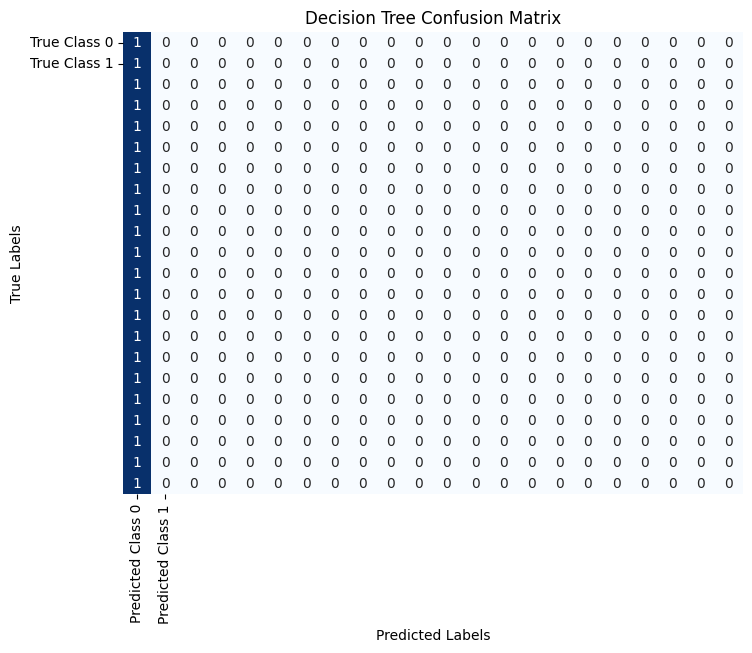

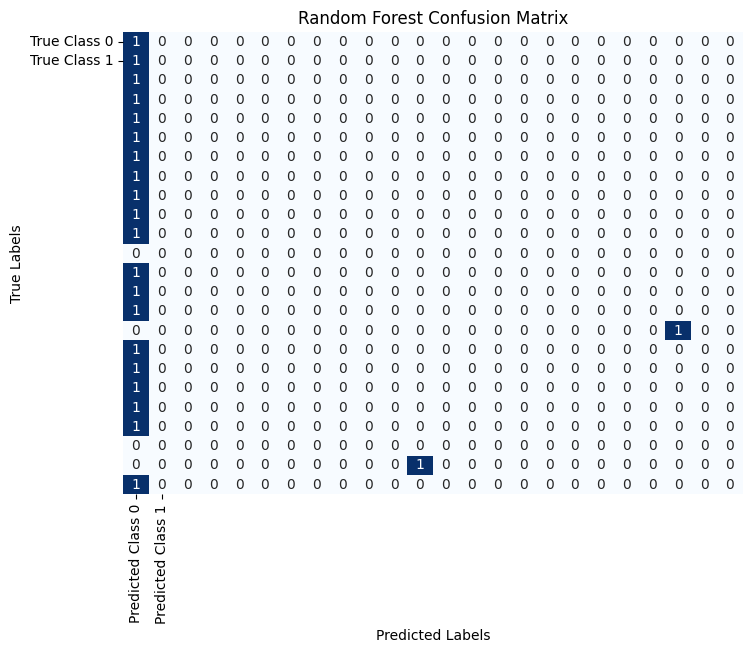

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

X_test_sample = X_test.sample(frac=0.01, random_state=42)
y_test_sample = y_test[X_test_sample.index]

dt_cm = confusion_matrix(y_test_sample, dt_clf.predict(X_test_sample))
rf_cm = confusion_matrix(y_test_sample, rf_clf.predict(X_test_sample))

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Class 0', 'Predicted Class 1'],
                yticklabels=['True Class 0', 'True Class 1'])
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(dt_cm, 'Decision Tree Confusion Matrix')
plot_confusion_matrix(rf_cm, 'Random Forest Confusion Matrix')


### Conclusion:

In this assignment, you:

- Loaded and preprocessed the dataset.
- Trained a Decision Tree and a Random Forest classifier.
- Compared their performance using accuracy, precision, recall, and F1-score.
- Visualized their performance using confusion matrices.

Which model performed better, and why?

-> I think both models performed very similarly, as the observed accuracy and precision for both are just about the same.

---